In [4]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset
dataset = "C:/Users/naufa/OneDrive/ドキュメント/Data Analysis/Dataset/archive (5)/retail_sales_dataset.csv"
df = pd.read_csv(dataset)

# Data Cleanup
df['Date'] = pd.to_datetime(df['Date'])


df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [5]:
# Adding an "age category" column
df['Age Category'] = pd.cut(df['Age'], 
                        bins=[0, 29, 50, float('inf')], 
                        labels=['Young', 'Adult', 'Older Adult'])

# Removing the 'Age Category' column and then reintroducing it at the preferred index.
df.insert(df.columns.get_loc('Age') + 1, 'Age Category', df.pop('Age Category'))

# To display results
df.head()



,Transaction ID,Date,Customer ID,Gender,Age,Age Category,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Adult,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Young,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Adult,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Adult,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Adult,Beauty,2,50,100


In [22]:
# add new column 'Month' dan 'Day'
df['Month'] = df['Date'].dt.strftime('%b')
df['Day'] = df['Date'].dt.day

# Moving the 'Month' and 'Day' columns next to the 'Date' column.
df.insert(df.columns.get_loc('Date') + 1, 'Month', df.pop('Month'))
df.insert(df.columns.get_loc('Date') + 2, 'Day', df.pop('Day'))

# Establishing a categorical sequence of months, starting from January and ending in December
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Converting the 'Month' column into a properly ordered category.
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)


df

,Transaction ID,Date,Month,Day,Customer ID,Gender,Age,Age Category,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,Nov,24,CUST001,Male,34,Adult,Beauty,3,50,150
1,2,2023-02-27,Feb,27,CUST002,Female,26,Young,Clothing,2,500,1000
2,3,2023-01-13,Jan,13,CUST003,Male,50,Adult,Electronics,1,30,30
3,4,2023-05-21,May,21,CUST004,Male,37,Adult,Clothing,1,500,500
4,5,2023-05-06,May,6,CUST005,Male,30,Adult,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,May,16,CUST996,Male,62,Older Adult,Clothing,1,50,50
996,997,2023-11-17,Nov,17,CUST997,Male,52,Older Adult,Beauty,3,30,90
997,998,2023-10-29,Oct,29,CUST998,Female,23,Young,Beauty,4,25,100
998,999,2023-12-05,Dec,5,CUST999,Female,36,Adult,Electronics,3,50,150


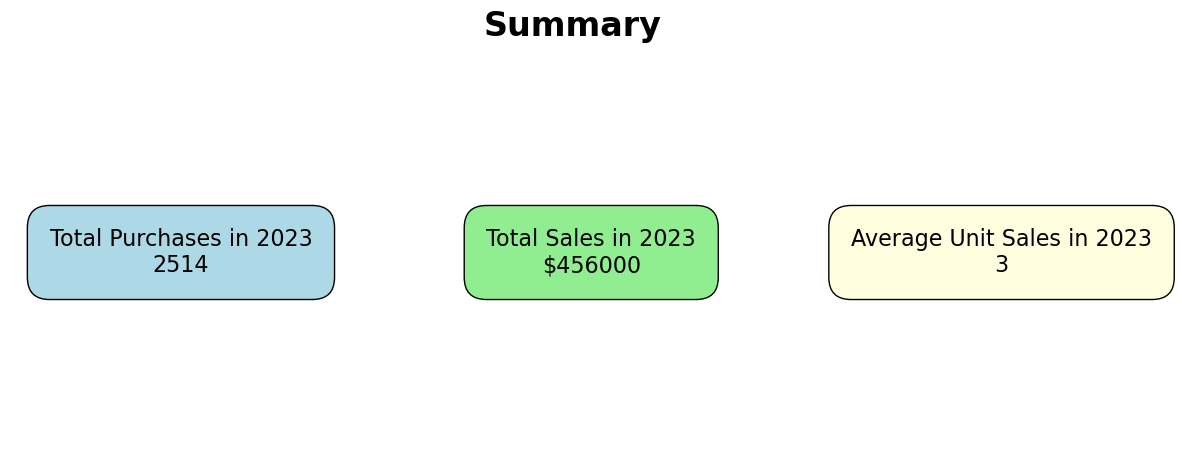

In [26]:
#Creating a layout for multiple cards.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Card 1 - Total Quantity
total_quantity = df['Quantity'].sum()
ax[0].text(0.5, 0.5, f'Total Purchases in 2023\n{total_quantity}', fontsize=16, ha='center', va='center', bbox=dict(facecolor='lightblue', boxstyle='round,pad=1'))
ax[0].axis('off')

# Card 2 - Total Sales
total_sales = df['Total Amount'].sum()
ax[1].text(0.5, 0.5, f'Total Sales in 2023\n${total_sales}', fontsize=16, ha='center', va='center', bbox=dict(facecolor='lightgreen', boxstyle='round,pad=1'))
ax[1].axis('off')

# Card 3 - Average Quantity
average_quantity = df['Quantity'].mean()
ax[2].text(0.5, 0.5, f'Average Unit Sales in 2023\n{average_quantity:.0f}', fontsize=16, ha='center', va='center', bbox=dict(facecolor='lightyellow', boxstyle='round,pad=1'))
ax[2].axis('off')

plt.suptitle('Summary', fontsize=24, fontweight='bold')
plt.show()


In [23]:
df_pivot_1 = df.pivot_table(values='Quantity', index='Month', columns='Product Category', aggfunc='sum')

df_pivot_1

C:\Users\naufa\AppData\Local\Temp\ipykernel_27896\4111905787.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot_1 = df.pivot_table(values='Quantity', index='Month', columns='Product Category', aggfunc='sum')


Product Category,Beauty,Clothing,Electronics
Month,,,
Jan,62,72,65
Feb,68,75,71
Mar,51,111,32
Apr,69,93,52
May,65,97,97
Jun,66,67,64
Jul,70,45,61
Aug,62,78,87
Sep,50,60,60


Text(0.5, 1.0, 'Sales Trend Throughout The Year of 2023')

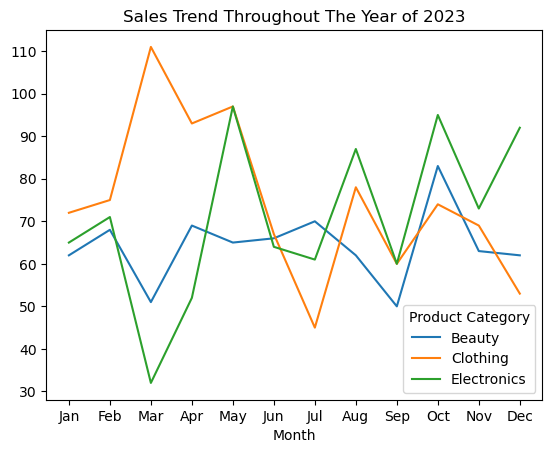

In [24]:
sns.lineplot(data=df_pivot_1, dashes=False, legend='full', palette='tab10')
plt.title('Sales Trend Throughout The Year of 2023')


In [10]:
df_total = df.pivot_table(values='Total Amount', index='Product Category', aggfunc='sum')

df_total

,Total Amount
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


Text(0.5, 1.0, 'Total Unit Sales by Product for The Year 2023')

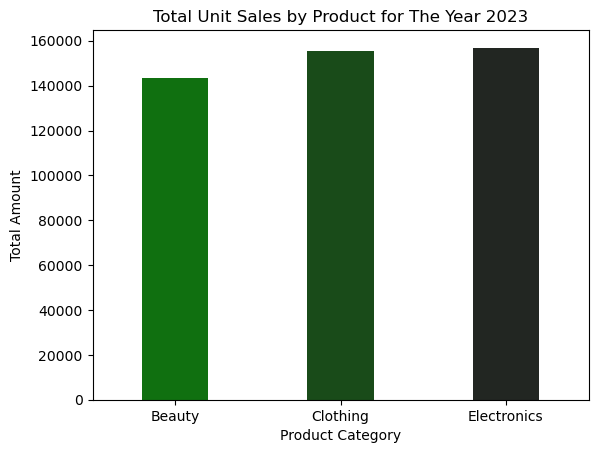

In [11]:
sns.barplot(data=df_total, x='Product Category', y='Total Amount', hue='Product Category', width=0.4, palette='dark:g_r')
plt.title('Total Unit Sales by Product for The Year 2023')

In [12]:
gender_new = df['Gender'].unique().tolist()

gender_new

['Male', 'Female']

In [13]:
age_new = df['Age Category'].unique().tolist()

age_new

['Adult', 'Young', 'Older Adult']

In [14]:
df_pivot_2 = df.pivot_table(values='Quantity', index='Gender', columns='Product Category', aggfunc='sum')

df_pivot_2

Product Category,Beauty,Clothing,Electronics
Gender,,,
Female,418,441,439
Male,353,453,410


In [15]:
df_pivot_3 = df.pivot_table(values='Quantity', index='Product Category', columns='Age Category', aggfunc='sum')

df_pivot_3

C:\Users\naufa\AppData\Local\Temp\ipykernel_27896\2230004147.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot_3 = df.pivot_table(values='Quantity', index='Product Category', columns='Age Category', aggfunc='sum')


Age Category,Young,Adult,Older Adult
Product Category,,,
Beauty,215,347,209
Clothing,214,396,284
Electronics,196,369,284


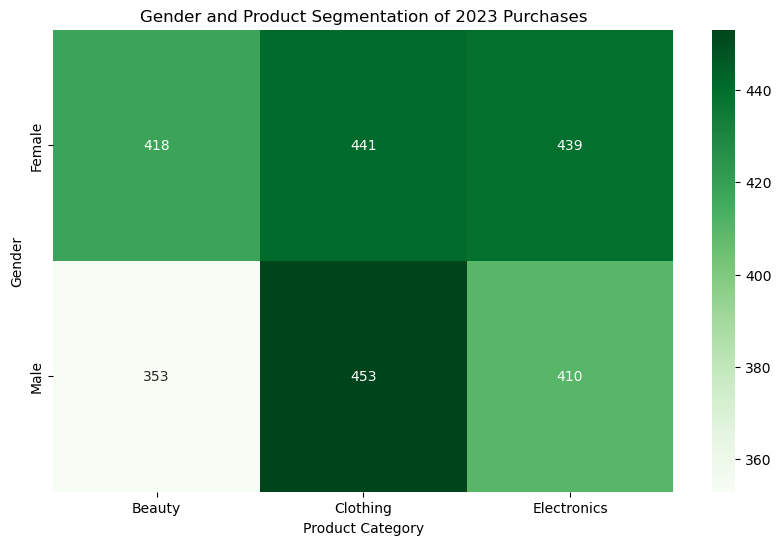

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot_2, annot=True, fmt='g', cmap='Greens')
plt.title('Gender and Product Segmentation of 2023 Purchases')
plt.show()

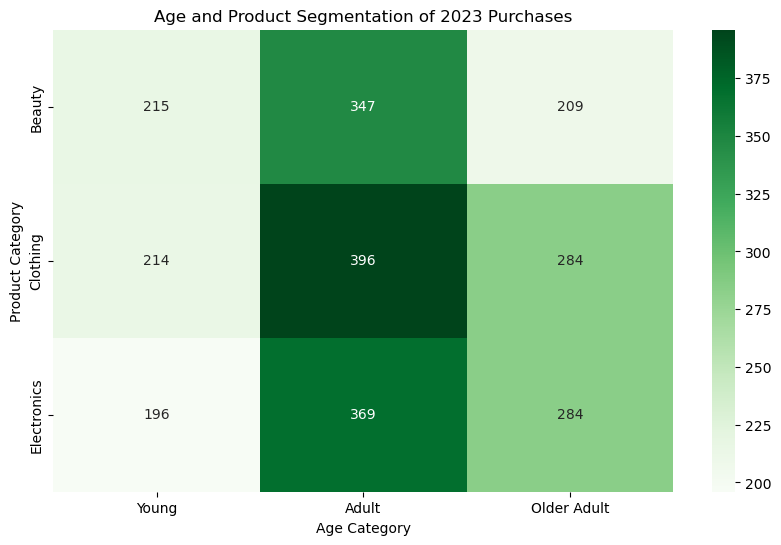

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot_3, annot=True, fmt='g', cmap='Greens')
plt.title('Age and Product Segmentation of 2023 Purchases')
plt.show()